# Recursión y Backtracking

<br><br><br><br><br><br><br><br>

### Mauricio Oyarzún Silva, Estructura de Datos, 2020-01

## ¿Que es la Recursión?

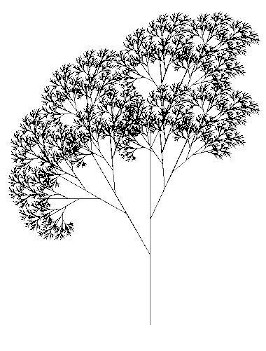

*La recursión es una forma de encontrar la solución de problemas basándose en la solución de un subconjunto del mismo problema.*

Algunos de estos problemas pueden ser resueltos habitualmente por medio de la iteración, sin embargo, esto requiere la capacidad o la posibilidad de encontrar el "índice" que determina esta iteración. La recursión no necesita conocer este orden, porque los pasos se generán por la repetición de llamadas de la misma función, hasta que una condición de parada es alcanzada.

### Recursividad y Computabilidad Universal

La mayoría de los lenguajes de computación admiten la recursividad. Incluso existen algunos lenguajes *funcionales* que solo admiten recursión y no iteración (como [Haskel](https://www.haskell.org/ "Página oficial de Haskell")). Ha sido probado que este tipo de lenguajes son ***Turing Completos***.


----

> La ***Turing completitud*** hace referencia a aquellos lenguajes que pueden implementar cualquier máquina de Turing. También se le llama *Computabilidad Universal* 

----


----

> Si no sabe quien es *Alan Turing*, el padre de la computación moderna, le recomiendo ver la película [The Imitation Game](https://www.imdb.com/title/tt2084970/ "IMDB: The Imitation Game").

----

### Problema de "call stack"

![image alt <](assets/callstack.png)

Uno de los principales problemas de la recursividad es el problema de *call stack*, que se produce cuando las llamadas sucesivas a la función recursiva van multiplicando el stack de entrada. Por ejemplo, si tenemos un vector, cada llamada recursiva tendrá una copia diferente de este vector (un nuevo *frame*), aumentando el uso de memoria.


----

> El ***call stack*** es una estructura de datos que se encarga de gestionar todos los elementos involucrados con las *rutinas/programas* que se ejecutan en un computador.

----

### Problema de "call stack"

![image alt <](assets/callstack.png)

Los lenguajes imperativos manejan este problema a través de las iteraciones, teniendo más problemas para manejarlo a través de recursión. Algunos lenguajes funcionales solucionan esto a través de una técnica llamada *tail call*.


----

> El ***tail call*** es un algoritmo a través del cual se crea un frame solo para la última llamada de la iteración permitiendo ahorrar memoria.

----

### Ejemplo. ¿Como maneja el *call stack* Python?

In [8]:
import os
import psutil
import random as rnd

process = psutil.Process(os.getpid())

In [9]:
def recursive_search(arreglo, inf, sup, busc):
    if inf >= sup:
        return -1
    
    print("Memoria en la función: %d KB" %(process.memory_info().rss/1024))
    
    middle = int((inf+sup)/2)
    
    if busc > arreglo[middle]:
        recursive_search(arreglo, middle+1, sup, busc)
    elif busc < arreglo[middle]:
        recursive_search(arreglo,inf,middle-1, busc)
    else:
        return middle


In [10]:
arreglo = []
for i in range(1000):
    arreglo.append(rnd.randint(1,200000))


### Ejemplo. ¿Como maneja el *call stack* Python?

In [11]:
print("Memoria antes de ejecutar: %d KB" % (process.memory_info().rss/1024))
recursive_search(arreglo,0,len(arreglo), 20)
print("Memoria despues de ejecutar: %d KB" % (process.memory_info().rss/1024))

Memoria antes de ejecutar: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria en la función: 45812 KB
Memoria despues de ejecutar: 45812 KB
